# Introduction

Ads CTR Analysis stands for Click-Through Rate Analysis for advertisements. Ads CTR Analysis is the process of examining the effectiveness of online advertisements by measuring the rate at which users click on an ad’s link to reach the advertiser’s website. If you want to learn how to perform Ads CTR Analysis, this article is for you. In this article, I’ll take you through the task of Ads CTR Analysis and Forecasting using Python.

![](https://getlifted.io/wp-content/uploads/2023/03/Graphic-with-click-through-rate-formula.-.jpg)

# Ads CTR Forecasting: Process We Can Follow

Ads CTR Analysis and Forecasting are crucial for businesses to assess the return on investment (ROI) of their advertising efforts and make data-driven decisions to improve ad performance. Below are the steps we can follow for the task of Ads CTR Analysis and Forecasting:

Gather ad data, including the number of ad impressions (how often an ad was shown), the number of clicks, and any other relevant metrics.
Explore the data to understand its characteristics and distribution. Calculate basic statistics, such as the mean CTR (Click-Through Rate) and standard deviation.
Create visualizations, such as line charts or bar graphs, to represent CTR trends over time.
Conduct A/B tests if necessary to compare the performance of different ad variations.
Analyze the CTR data to identify factors that influence ad performance.
Build a forecasting model to predict future CTR values.
So, the process begins with collecting data. I found an ideal dataset for the task of Ads CTR Analysis and Forecasting.

# Importing the necessary Python libraries and the dataset:

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.statespace.sarimax import SARIMAX #  Import SARIMAX model from statsmodels for time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose # Import seasonal decompose function from statsmodels for time series decomposition
import matplotlib.pyplot as plt

data = pd.read_csv("/kaggle/input/ctr-data/ctr.csv")
print(data.head())

         Date  Clicks  Impressions
0  2022-10-19    2851        58598
1  2022-10-20    2707        57628
2  2022-10-21    2246        50135
3  2022-10-22    1686        40608
4  2022-10-23    1808        41999


In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.statespace.sarimax import SARIMAX #  Import SARIMAX model from statsmodels for time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose # Import seasonal decompose function from statsmodels for time series decomposition
import matplotlib.pyplot as plt

data = pd.read_csv("/kaggle/input/ctr-data/ctr.csv")
print(data.head())

         Date  Clicks  Impressions
0  2022-10-19    2851        58598
1  2022-10-20    2707        57628
2  2022-10-21    2246        50135
3  2022-10-22    1686        40608
4  2022-10-23    1808        41999


Let’s start by converting the Date column in the DataFrame from a string format to a datetime format and then setting it as the index of the DataFrame:

In [2]:
# Data Preparation
data['Date'] = pd.to_datetime(data['Date'],
                                     format='%Y-%m-%d')
data.set_index('Date', inplace=True)

# Visualization
Now, let’s visualize the clicks and impressions over time:

In [3]:
# Visualize Clicks and Impressions
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['Clicks'], mode='lines', name='Clicks'))
fig.add_trace(go.Scatter(x=data.index, y=data['Impressions'], mode='lines', name='Impressions'))
fig.update_layout(title='Clicks and Impressions Over Time')
fig.show()

Now, let’s have a look at the relationship between clicks and impressions:

In [4]:
# Create a scatter plot to visualize the relationship between Clicks and Impressions
fig = px.scatter(data, x='Clicks', y='Impressions', title='Relationship Between Clicks and Impressions',
                 labels={'Clicks': 'Clicks', 'Impressions': 'Impressions'})

# Customize the layout
fig.update_layout(xaxis_title='Clicks', yaxis_title='Impressions')

# Show the plot
fig.show()

So, the relationship between clicks and impressions is linear. It means higher ad impressions result in higher ad clicks. Now, let’s calculate and visualize CTR over time:

In [5]:
# Calculate and visualize CTR
data['CTR'] = (data['Clicks'] / data['Impressions']) * 100
fig = px.line(data, x=data.index, y='CTR', title='Click-Through Rate (CTR) Over Time')
fig.show()

Now, let’s have a look at the average CTR by day of the week:

In [6]:
data['DayOfWeek'] = data.index.dayofweek
# Calculate the week of the month
data['WeekOfMonth'] = data.index.day // 7 + 1


# EDA based on DayOfWeek
day_of_week_ctr = data.groupby('DayOfWeek')['CTR'].mean().reset_index()
day_of_week_ctr['DayOfWeek'] = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

fig = px.bar(day_of_week_ctr, x='DayOfWeek', y='CTR', title='Average CTR by Day of the Week')
fig.show()

Now, let’s compare the CTR on weekdays and weekends

In [7]:
# Create a new column 'DayCategory' to categorize weekdays and weekends
data['DayCategory'] = data['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Calculate average CTR for weekdays and weekends
ctr_by_day_category = data.groupby('DayCategory')['CTR'].mean().reset_index()

# Create a bar plot to compare CTR on weekdays vs. weekends
fig = px.bar(ctr_by_day_category, x='DayCategory', y='CTR', title='Comparison of CTR on Weekdays vs. Weekends',
             labels={'CTR': 'Average CTR'})

# Customize the layout
fig.update_layout(yaxis_title='Average CTR')

# Show the plot
fig.show()

Now, let’s compare the impressions and clicks on weekdays and weekends:

In [8]:
# Group the data by 'DayCategory' and calculate the sum of Clicks and Impressions for each category
grouped_data = data.groupby('DayCategory')[['Clicks', 'Impressions']].sum().reset_index()

# Create a grouped bar chart to visualize Clicks and Impressions on weekdays vs. weekends
fig = px.bar(grouped_data, x='DayCategory', y=['Clicks', 'Impressions'],
             title='Impressions and Clicks on Weekdays vs. Weekends',
             labels={'value': 'Count', 'variable': 'Metric'},
             color_discrete_sequence=['blue', 'green'])

# Customize the layout
fig.update_layout(yaxis_title='Count')
fig.update_xaxes(title_text='Day Category')

# Show the plot
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Ads CTR Forecasting
Now, let’s see how to forecast the Ads CTR. As CTR is dependent on impressions and impressions change over time, we can use Time Series forecasting techniques to forecast CTR. As CTR is seasonal, let’s calculate the p, d, and q values for the SARIMA model:

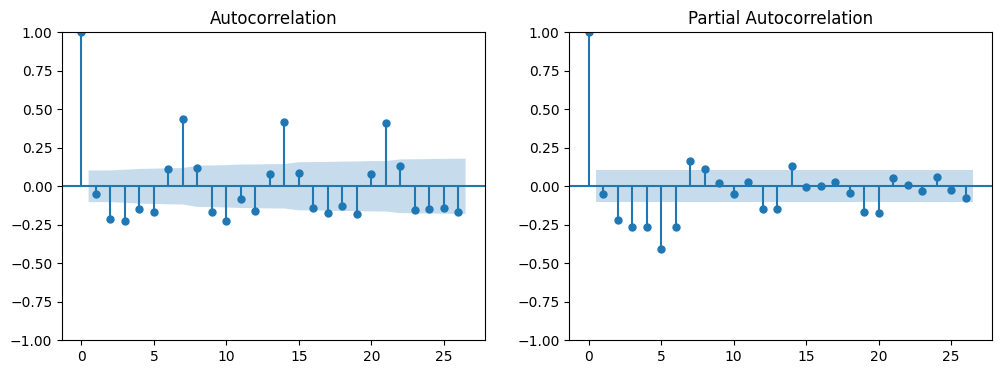

In [9]:
data.reset_index(inplace=True)

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# resetting index
time_series = data.set_index('Date')['CTR']

# Differencing
differenced_series = time_series.diff().dropna()

# Plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

- The code resets the index of the DataFrame `data` using `reset_index(inplace=True)`.
- It imports necessary modules for ARIMA modeling and time series visualization.
- Then, it sets the 'Date' column as the index of the DataFrame and selects the 'CTR' column as the time series data.
- The time series is differenced using `.diff()` method to make it stationary.
- ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots of the differenced time series are then plotted using `plot_acf()` and `plot_pacf()` functions respectively.
- Finally, the plots are displayed using `plt.show()`.


The value of p, d, and q will be one here. You can learn more about calculating p, d, and q values from here. And as we are using the SARIMA model here, the value of s will be 12.

Now, let’s train the forecasting model using SARIMA:

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, d, q, s = 1, 1, 1, 12

model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(p, d, q, s))
results = model.fit()
print(results.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.41935D-01    |proj g|=  7.75846D-01

At iterate    5    f=  2.17564D-01    |proj g|=  3.30003D-01

At iterate   10    f=  2.01237D-01    |proj g|=  1.01758D-01

At iterate   15    f=  1.96444D-01    |proj g|=  2.52583D-02

At iterate   20    f=  1.96375D-01    |proj g|=  1.30661D-02

At iterate   25    f=  1.95805D-01    |proj g|=  5.65740D-02

At iterate   30    f=  1.95618D-01    |proj g|=  1.07960D-02

At iterate   35    f=  1.95537D-01    |proj g|=  9.55052D-03

At iterate   40    f=  1.95523D-01    |proj g|=  2.85177D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

#### Code Explanation:

* It imports the SARIMAX class from statsmodels.tsa.statespace.sarimax.
* Sets the values of p, d, q, and s representing the order and seasonal order of the SARIMA model.
* Initializes a SARIMAX model with the specified order and seasonal order.
* Fits the SARIMAX model to the time series data.
* Prints the summary of the fitted model.

#### Output Explanation:

* The output provides information about the optimization process and the results of the SARIMAX model.
* The optimization process is performed using the L-BFGS-B algorithm.
* It displays information such as the number of iterations, function evaluations, convergence criteria, and final function value.
* The SARIMAX results section presents various statistics about the fitted model, including coefficients, standard errors, z-scores, and p-values for each parameter.
* It also includes information about the log likelihood, AIC (Akaike Information Criterion), BIC (Bayesian Information Criterion), and other model evaluation metrics.
* Diagnostic tests such as Ljung-Box test and Jarque-Bera test are also provided to assess the goodness-of-fit of the model.

Overall, the output gives a comprehensive summary of the SARIMAX model's performance and parameter estimates.







 Here's a brief explanation of the output values:

- **Dep. Variable**: The dependent variable of the model, in this case, 'CTR'.
- **No. Observations**: Number of observations in the dataset.
- **Model**: Specification of the SARIMAX model, including the order and seasonal order.
- **Log Likelihood**: Log-likelihood value of the fitted model.
- **AIC**: Akaike Information Criterion, a measure of model quality taking into account the model's complexity.
- **BIC**: Bayesian Information Criterion, similar to AIC but penalizes models with more parameters more severely.
- **HQIC**: Hannan-Quinn Information Criterion, another measure of model quality.
- **Coefficients**: Estimated coefficients of the ARIMA and seasonal components of the model.
- **Std Err**: Standard errors of the coefficient estimates.
- **z**: Z-scores, which indicate the significance of the coefficient estimates.
- **P>|z|**: P-values associated with the z-scores, indicating the significance of the coefficient estimates.
- **Ljung-Box (L1) (Q)**: Results of the Ljung-Box test for autocorrelation in the residuals.
- **Jarque-Bera (JB)**: Results of the Jarque-Bera test for normality of the residuals.
- **Prob(Q)**: P-value associated with the Ljung-Box test.
- **Prob(JB)**: P-value associated with the Jarque-Bera test.
- **Heteroskedasticity (H)**: Test statistic for heteroskedasticity in the residuals.
- **Kurtosis**: Measure of the "peakedness" of the distribution of the residuals.

These values provide insights into the goodness-of-fit of the model, the significance of the parameters, and the presence of autocorrelation and heteroskedasticity in the residuals.

Now, here’s how to predict the future CTR values:

In [11]:
# Predict future values
future_steps = 100
predictions = results.predict(len(time_series), len(time_series) + future_steps - 1)
print(predictions)

2023-10-19    3.852393
2023-10-20    3.889487
2023-10-21    3.820322
2023-10-22    3.727593
2023-10-23    3.710483
                ...   
2024-01-22    3.545839
2024-01-23    3.466916
2024-01-24    3.561460
2024-01-25    3.546956
2024-01-26    3.580421
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


Now, let’s visualize the forecasted trend of CTR:

In [12]:
# Create a DataFrame with the original data and predictions
forecast = pd.DataFrame({'Original': time_series, 'Predictions': predictions})

# Plot the original data and predictions
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Predictions'],
                         mode='lines', name='Predictions'))

fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Original'],
                         mode='lines', name='Original Data'))

fig.update_layout(title='CTR Forecasting',
                  xaxis_title='Time Period',
                  yaxis_title='Impressions',
                  legend=dict(x=0.1, y=0.9),
                  showlegend=True)

fig.show()

# Summary

So, this is how we can analyze and forecast CTR using Python. Ads Click Through Rate Analysis and Forecasting are crucial for businesses to assess the return on investment (ROI) of their advertising efforts and make data-driven decisions to improve ad performance. 